<a href="https://colab.research.google.com/github/totheBrenda/portfolio/blob/main/p002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Code States AI Bootcamp 03 / Section 2 : Machine learning**
- Project Presenter : 백지희 (JeeHee Brenda BAEK)

- Subject : Predict next-day rain in Australia

- Goal: Predict next-day rain by training classification models.

- Source : https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [ ]:
## Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Load data set
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Files/project2/project2.csv')

## Explore data set

feature report

     'Date'              The date of observation
     'Location'          The common name of the location of the weather station
     'MinTemp'           The minimum temperature in degrees celsius
     'MaxTemp'           The maximum temperature in degrees celsius
     'Rainfall'          The amount of rainfall recorded for the day in mm
     'Evaporation'       The so-called Class A pan evaporation (mm) in the 24 hours to 9am
     'Sunshine'          The number of hours of bright sunshine in the day.
     'WindGustDir'       The direction of the strongest wind gust in the 24 hours to midnight
     'WindGustSpeed'     The speed (km/h) of the strongest wind gust in the 24 hours to midnight
     'WindDir9am'        Direction of the wind at 9am
     'WindDir3pm'        Direction of the wind at 3pm
     'WindSpeed9am'      Wind speed (km/hr) averaged over 10 minutes prior to 9am
     'WindSpeed3pm'      Wind speed (km/hr) averaged over 10 minutes prior to 3pm
     'Humidity9am'       Humidity (percent) at 9am
     'Humidity3pm'       Humidity (percent) at 3pm
     'Pressure9am'       Atmospheric pressure (hpa) reduced to mean sea level at 9am
     'Pressure3pm'       Atmospheric pressure (hpa) reduced to mean sea level at 3pm
     'Cloud9am'          Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many
     'Cloud3pm'          Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
     'Temp9am'           Temperature (degrees C) at 9am
     'Temp3pm'           Temperature (degrees C) at 3pm
     'RainToday'         Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
     'RainTomorrow'      The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

In [ ]:
## Preprocessing
target = 'RainTomorrow'

# print("Original data shape : ", df.shape)
# print("Duplicate data : ", df.duplicated().value_counts())
# print("Missing value ratio : \n", df.isna().mean()*100)

## Drop empty targets
df1 = df.dropna(subset=[target])

## Drop 'Evaporation', 'Sunshine' >> Too many missing values
df2 = df1.drop(['Evaporation', 'Sunshine'], axis=1)

## Drop rows with missing values (except 'Colud9am', 'Cloud3pm') >> The amount of data remaining is large enough
df3 = df2.dropna(subset = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday'])

## Feature Engineering

Replaces rain values with 0 and 1.

- columns : 'RainToday', 'RainTomorrow'

- mapping : 'No' : 0, 'Yes' : 1

---

Replace the direction numerically.

- columns : 'WindGustDir', 'WindDir9am', 'WindDir3pm'

- mapping : 'N' : 0, 'NNE' : 1, 'NE' : 2, 'ENE' : 3, 'E' : 4, 'ESE' : 5, 'SE' : 6, 'SSE' : 7, 'S' : 8,

　　　　　　　'SSW' : 9, 'SW' : 10, 'WSW' : 11, 'W' : 12, 'WNW' : 13, 'NW' : 14, 'NNW' : 15


---


Divide the seasons into 3 month increments.

- column : 'Season'

- mapping : '9 - 11' : 1(spring), '12 - 2' : 2(summer), '3 - 5' : 3(fall), '6 - 8' : 4(winter)


---


Organize the column representing the temperature.

- column : 'Max-Min'

- drop : 'MaxTemp', 'MinTemp', 'Temp9am', 'Temp3pm'

In [ ]:
## Replace data values with numbers ('RainToday', 'RainTomorrow' -> 'No' : 0, 'Yes' : 1)
df4 = df3.copy()
df4[['RainToday', 'RainTomorrow']] = df4[['RainToday', 'RainTomorrow']].replace({'Yes' : 1, 'No' : 0})

In [ ]:
## Replace the direction numerically
def dir(x) :
  if x ==  'N' :
    return 0
  elif x == 'NNE' :
    return 1
  elif x == 'NE' :
    return 2
  elif x == 'ENE' :
    return 3
  elif x == 'E' :
    return 4
  elif x == 'ESE' :
    return 5
  elif x == 'SE' :
    return 6
  elif x == 'SSE' :
    return 7
  elif x == 'S' :
    return 8
  elif x == 'SSW' :
    return 9
  elif x == 'SW' :
    return 10
  elif x == 'WSW' :
    return 11
  elif x == 'W' :
    return 12
  elif x == 'WNW' :
    return 13
  elif x == 'NW' :
    return 14
  elif x == 'NNW' :
    return 15

df5 = df4.copy()
df5['WindGustDir'] = df5['WindGustDir'].apply(dir)
df5['WindDir9am'] = df5['WindDir9am'].apply(dir)
df5['WindDir3pm'] = df5['WindDir3pm'].apply(dir)

In [ ]:
## Change the type of 'Date'
df6 = df5.copy()
df6['Date'] = pd.to_datetime(df6['Date'], format = '%Y-%m-%d')

## Divide the seasons into 3 month increments.
def season(x) :
  if x.strftime('%m') == '09' or x.strftime('%m') == '10' or x.strftime('%m') == '11' :
    return 1
  elif x.strftime('%m') == '12' or x.strftime('%m') == '01' or x.strftime('%m') == '02' :
    return 2
  elif x.strftime('%m') == '03' or x.strftime('%m') == '04' or x.strftime('%m') == '05' :
    return 3
  elif x.strftime('%m') == '06' or x.strftime('%m') == '07' or x.strftime('%m') == '08' :
    return 4

df6['Season'] = df6['Date'].apply(season)

In [ ]:
## Create a daily temperature difference
df7 = df6.copy()
df7['Max-Min'] = df7['MaxTemp'] - df7['MinTemp']
df7 = df7.drop(['MaxTemp', 'MinTemp', 'Temp9am', 'Temp3pm'], axis = 1)

In [ ]:
## Separate the data set
train = df7[(df7['Date'] < '2014/03/01')]
val = df7[((df7['Date'] >= '2014/03/01') & (df7['Date'] < '2016/03/01'))]
test = df7[(df7['Date'] >= '2016/03/01')]

## Outlier detection (train data set)
Use a box plot to drop data rows that appear to be outliers within 0.1% (15) of the data with a target value of "1".

columns : 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
'Max-Min'

In [ ]:
## 1. Rainfall (-7)
colname = 'Rainfall'
# train[colname].plot(kind='box');
# train[colname].describe()
train1 = train[(train[colname] < 200)]
train1[colname].plot(kind='box');
print(train.shape, "to", train1.shape, ", (drop ", train1.shape[0] - train.shape[0], "rows)")

In [ ]:
## 2. WindGustSpeed (No drop)
colname = 'WindGustSpeed'
train1[colname].plot(kind='box');
train1[colname].describe()

In [ ]:
## 3. WindSpeed9am (-2)
colname = 'WindSpeed9am'
# train1[colname].plot(kind='box');
# train1[colname].describe()
train2 = train1[(train1[colname] < 70)]
train2[colname].plot(kind='box');
print(train1.shape, "to", train2.shape, ", (drop ", train2.shape[0] - train1.shape[0], "rows)")

In [ ]:
## 4. WindSpeed3pm (-4)
colname = 'WindSpeed3pm'
# train2[colname].plot(kind='box');
# train2[colname].describe()
train3 = train2[(train2[colname] < 70)]
train3[colname].plot(kind='box');
print(train2.shape, "to", train3.shape, ", (drop ", train3.shape[0] - train2.shape[0], "rows)")

In [ ]:
## 5. Humidity9am (No drop)
colname = 'Humidity9am'
train3[colname].plot(kind='box');
train3[colname].describe()

In [ ]:
## 6. Humidity3pm (No drop)
colname = 'Humidity3pm'
train3[colname].plot(kind='box');
train3[colname].describe()

In [ ]:
## 7. Pressure9am (No drop)
colname = 'Pressure9am'
train3[colname].plot(kind='box');
train3[colname].describe()

In [ ]:
## 8. Pressure3pm (No drop)
colname = 'Pressure3pm'
train3[colname].plot(kind='box');
train3[colname].describe()

In [ ]:
## 9. Max-Min (No drop)
colname = 'Max-Min'
train3[colname].plot(kind='box');
train3[colname].describe()

In [ ]:
## Separate the data set
X = train3.drop([target, 'Date'], axis = 1)
y_train = train3[target]

X_val = val.drop([target, 'Date'], axis = 1)
y_val = val[target]

X_test = test.drop([target, 'Date'], axis = 1)
y_test = test[target]

print(X.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(67577, 17) (67577,) (27194, 17) (27194,) (18141, 17) (18141,)


## Missing values
Estimate missing values using a Linear Regression model.

columns : 'Cloud9am', 'Cloud3pm'


In [ ]:
!pip install category_encoders==2.*

In [ ]:
## Separate the data set
missing = ['Cloud9am', 'Cloud3pm']

X1 = X.drop(missing, axis = 1)
y1 = X[missing]

X2 = X.dropna()
X3 = X2.drop(missing, axis = 1)
y3 = X2[missing]

print(X.shape, X1.shape, y1.shape, X2.shape, X3.shape, y3.shape)

(67577, 17) (67577, 15) (67577, 2) (45156, 17) (45156, 15) (45156, 2)


In [ ]:
## Fill in Missing Values Using a Linear Regression Model
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn import linear_model

lin_pipe = make_pipeline(
    OrdinalEncoder(),
    linear_model.LinearRegression()
)

lin_pipe.fit(X3, y3)

missing_pred = lin_pipe.predict(X1)
missing_pred_0 = missing_pred[:,0]
missing_pred_1 = missing_pred[:,1]

import numpy as np
X_train = X.copy()
X_train['Cloud9am'] = np.where(X_train['Cloud9am'].isnull(), pd.Series(missing_pred_0.flatten()), X_train['Cloud9am'])
X_train['Cloud3pm'] = np.where(X_train['Cloud3pm'].isnull(), pd.Series(missing_pred_1.flatten()), X_train['Cloud3pm'])
X_train.info()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
Int64Index: 67577 entries, 0 to 144246
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       67577 non-null  object 
 1   Rainfall       67577 non-null  float64
 2   WindGustDir    67577 non-null  int64  
 3   WindGustSpeed  67577 non-null  float64
 4   WindDir9am     67577 non-null  int64  
 5   WindDir3pm     67577 non-null  int64  
 6   WindSpeed9am   67577 non-null  float64
 7   WindSpeed3pm   67577 non-null  float64
 8   Humidity9am    67577 non-null  float64
 9   Humidity3pm    67577 non-null  float64
 10  Pressure9am    67577 non-null  float64
 11  Pressure3pm    67577 non-null  float64
 12  Cloud9am       67577 non-null  float64
 13  Cloud3pm       67577 non-null  float64
 14  RainToday      67577 non-null  int64  
 15  Season         67577 non-null  int64  
 16  Max-Min        67577 non-null  float64
dtypes: float64(11), int64(5), object(1)
memory usage:

## Baseline model
The Baseline model is a DecisionTreeClassifier with no tuning. (random_state = 2)

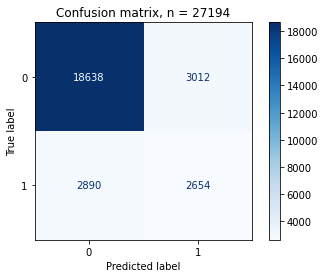

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     21650
           1       0.47      0.48      0.47      5544

    accuracy                           0.78     27194
   macro avg       0.67      0.67      0.67     27194
weighted avg       0.78      0.78      0.78     27194



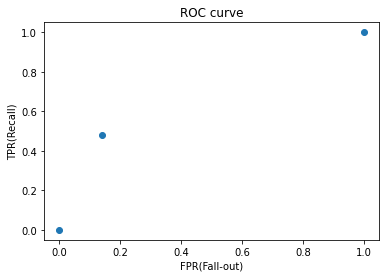

Accuracy of the train set :  1.0
Accuracy of the validation set :  0.782966830918585
AUC Score :  0.6697966634340767


In [ ]:
## Baseline model, DecisionTreeClassifire(pipe1)
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

pipe1 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state = 2)
)
pipe1.fit(X_train, y_train)

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe1, X_val, y_val, cmap=plt.cm.Blues, ax=ax, values_format = '.0f');
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=12)
plt.show()

from sklearn.metrics import classification_report
y_pred1 = pipe1.predict(X_val)
print(classification_report(y_val, y_pred1))

from sklearn.metrics import roc_curve
y_pred1_proba = pipe1.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred1_proba)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show();

from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_val, y_pred1_proba)

print("Accuracy of the train set : ", pipe1.score(X_train, y_train))
print("Accuracy of the validation set : ", pipe1.score(X_val, y_val))
print("AUC Score : ", auc_score1)

## Ensemble model
Use RandomForestClassifier to create a basic ensemble model without tuning. (random_state = 2)

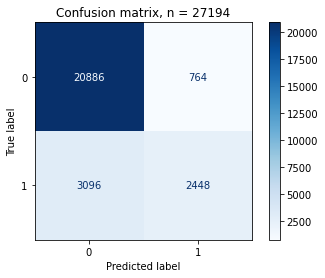

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     21650
           1       0.76      0.44      0.56      5544

    accuracy                           0.86     27194
   macro avg       0.82      0.70      0.74     27194
weighted avg       0.85      0.86      0.84     27194



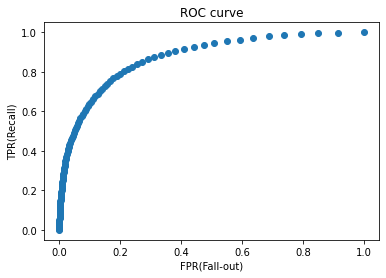

Accuracy of the train set :  0.9999852020657917
Accuracy of the validation set :  0.8580569243215416
AUC Score :  0.8750515589747692


In [ ]:
## Basic ensemble model, RandomForestClassifier(pipe2)
from sklearn.ensemble import RandomForestClassifier

pipe2 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 2)
)
pipe2.fit(X_train, y_train)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe2, X_val, y_val, cmap=plt.cm.Blues, ax=ax, values_format = '.0f');
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=12)
plt.show()

y_pred2 = pipe2.predict(X_val)
print(classification_report(y_val, y_pred2))

y_pred2_proba = pipe2.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred2_proba)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show();

auc_score2 = roc_auc_score(y_val, y_pred2_proba)

print("Accuracy of the train set : ", pipe2.score(X_train, y_train))
print("Accuracy of the validation set : ", pipe2.score(X_val, y_val))
print("AUC Score : ", auc_score2)

## Feature selection
Analyze the extent to which each data affects the model.

- Selection : 'Humidity3pm', 'WindGustSpeed', 'Pressure3pm', 'Rainfall', 'Cloud3pm', 'Max-Min', 'Pressure9am', 'Humidity9am', 'Cloud9am'

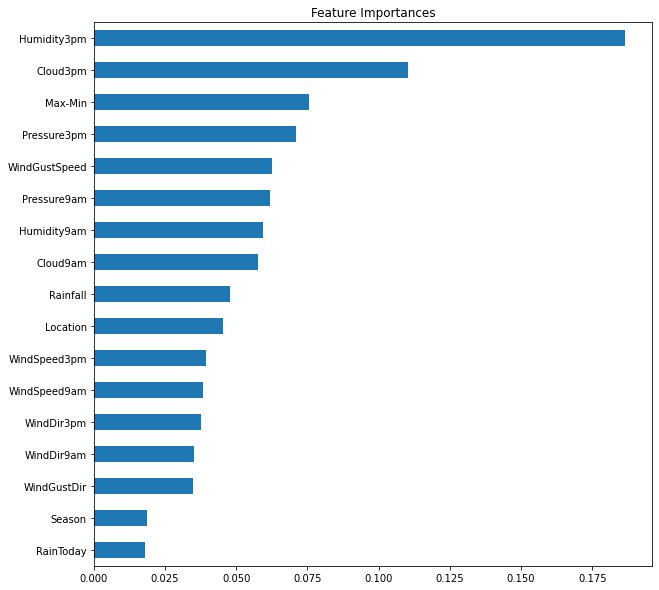

In [ ]:
# Feature importances
rf = pipe2.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
importances.sort_values()[-17:].plot.barh();

In [ ]:
pip install eli5

In [ ]:
## Permutation importance(pipe3)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline

pipe3 = Pipeline([
                  ('pr', make_pipeline(OrdinalEncoder(), SimpleImputer())),
                  ('rf', RandomForestClassifier(random_state = 2))
])
pipe3.fit(X_train, y_train)

permuter = PermutationImportance(
    pipe3.named_steps['rf'],
    scoring = 'accuracy',
    n_iter = 5,
    random_state = 2
)

X_val_transformed = pipe3.named_steps['pr'].transform(X_val)
permuter.fit(X_val_transformed, y_val);
eli5.show_weights(permuter, feature_names = X_val.columns.tolist())

Weight,Feature
0.0528 ± 0.0017,Humidity3pm
0.0131 ± 0.0015,WindGustSpeed
0.0093 ± 0.0022,Pressure3pm
0.0054 ± 0.0012,Rainfall
0.0053 ± 0.0016,Cloud3pm
0.0029 ± 0.0009,Location
0.0027 ± 0.0012,Humidity9am
0.0018 ± 0.0013,Max-Min
0.0017 ± 0.0005,RainToday
0.0015 ± 0.0011,WindDir3pm


In [ ]:
## Feature selection
sel_feature = ['Humidity3pm', 'WindGustSpeed', 'Pressure3pm', 'Rainfall', 'Cloud3pm', 'Max-Min', 'Pressure9am', 'Humidity9am', 'Cloud9am']
X_train_sel = X_train[sel_feature]
X_val_sel = X_val[sel_feature]
X_test_sel = X_test[sel_feature]
X_train.shape, X_train_sel.shape, X_val.shape, X_val_sel.shape, X_test.shape, X_test_sel.shape

((67577, 17), (67577, 9), (27194, 17), (27194, 9), (18141, 17), (18141, 9))

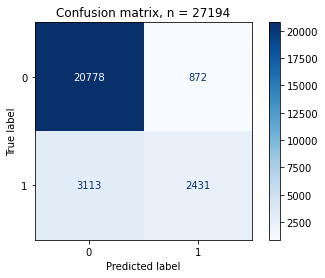

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21650
           1       0.74      0.44      0.55      5544

    accuracy                           0.85     27194
   macro avg       0.80      0.70      0.73     27194
weighted avg       0.84      0.85      0.84     27194



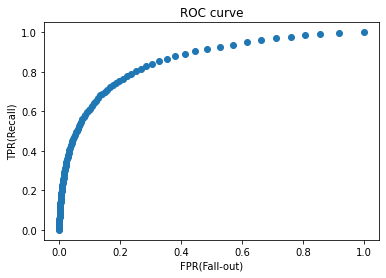

Accuracy of the train set :  0.9999852020657917
Accuracy of the validation set :  0.8534603221298815
AUC Score :  0.8553963921631358


In [ ]:
## Ensemble model with selected X, RandomForestClassifier(pipe4)
pipe4 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 2)
)
pipe4.fit(X_train_sel, y_train)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe4, X_val_sel, y_val, cmap=plt.cm.Blues, ax=ax, values_format = '.0f');
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=12)
plt.show()

y_pred4 = pipe4.predict(X_val_sel)
print(classification_report(y_val, y_pred4))

y_pred4_proba = pipe4.predict_proba(X_val_sel)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred4_proba)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show();

auc_score4 = roc_auc_score(y_val, y_pred4_proba)

print("Accuracy of the train set : ", pipe4.score(X_train_sel, y_train))
print("Accuracy of the validation set : ", pipe4.score(X_val_sel, y_val))
print("AUC Score : ", auc_score4)

## Threshold tuning

- No significant change.

In [ ]:
## Find the optimal 'threshold' value
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

y_pred4_threshold = y_pred4_proba > optimal_threshold
auc_score4_threshold = roc_auc_score(y_val, y_pred4_threshold)

print(classification_report(y_val, y_pred4_threshold))
print("Threshold : ", optimal_threshold)
print("AUC Score : ", auc_score4_threshold)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     21650
           1       0.52      0.73      0.60      5544

    accuracy                           0.80     27194
   macro avg       0.72      0.78      0.74     27194
weighted avg       0.84      0.80      0.82     27194

Threshold :  0.24
AUC Score :  0.7778728142527219


## Hyperparameter Tuning
Set hyperparameters that can increase the AUC Score of the ensemble model.

- simpleimputer : strategy

- randomforestclassifier : n_estimators, max_depth, max_features, min_samples_leaf


In [ ]:
## Use 'RandomizedSearchCV' to find the optimal value
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
dists = {
    'simpleimputer__strategy' : ['mean', 'median'], 
    'randomforestclassifier__n_estimators' : randint(80, 130), 
    'randomforestclassifier__max_depth' : [13, 14, 15],
    'randomforestclassifier__max_features' : uniform(0, 1),
    'randomforestclassifier__min_samples_leaf' : [8, 9, 10, 11, 12]
}

clf1 = RandomizedSearchCV(
    pipe4,
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf1.fit(X_train_sel, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 17.7min finished


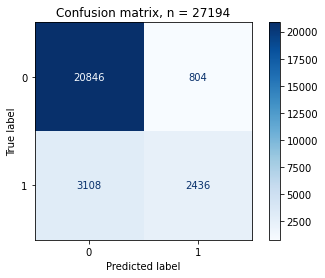

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21650
           1       0.75      0.44      0.55      5544

    accuracy                           0.86     27194
   macro avg       0.81      0.70      0.73     27194
weighted avg       0.85      0.86      0.84     27194



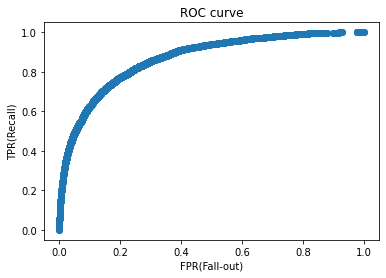

Accuracy of the train set :  0.8897553901475354
Accuracy of the validation set :  0.856144737809811
AUC Score :  0.867960802348793


In [ ]:
## Ensemble model with hyperparameters applied, RandomForestClassifier(pipe5)
pipe5 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy = clf1.best_params_['simpleimputer__strategy']),
    RandomForestClassifier(random_state = 2,
                           max_depth = clf1.best_params_['randomforestclassifier__max_depth'],
                           max_features = clf1.best_params_['randomforestclassifier__max_features'],
                           min_samples_leaf = clf1.best_params_['randomforestclassifier__min_samples_leaf'],
                           n_estimators = clf1.best_params_['randomforestclassifier__n_estimators'])
)
pipe5.fit(X_train_sel, y_train)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe5, X_val_sel, y_val, cmap=plt.cm.Blues, ax=ax, values_format = '.0f');
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=12)
plt.show()

y_pred5 = pipe5.predict(X_val_sel)
print(classification_report(y_val, y_pred5))

y_pred5_proba = pipe5.predict_proba(X_val_sel)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred5_proba)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show();

auc_score5 = roc_auc_score(y_val, y_pred5_proba)

print("Accuracy of the train set : ", pipe5.score(X_train_sel, y_train))
print("Accuracy of the validation set : ", pipe5.score(X_val_sel, y_val))
print("AUC Score : ", auc_score5)

## Boosting model
Use XGBClassifier to create a basic boosting model without tuning. (random_state = 2)

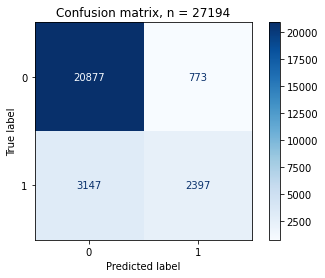

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21650
           1       0.76      0.43      0.55      5544

    accuracy                           0.86     27194
   macro avg       0.81      0.70      0.73     27194
weighted avg       0.85      0.86      0.84     27194



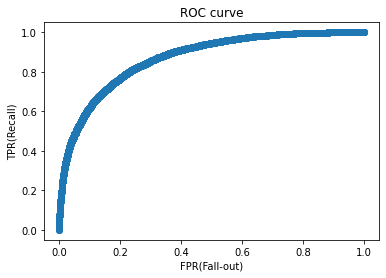

Accuracy of the train set :  0.8542403480474126
Accuracy of the validation set :  0.8558505552695448
AUC Score :  0.8704070147199477


In [ ]:
## Basic boosgint model, XGBClassifier(pipe6)
from xgboost import XGBClassifier
pipe6 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(random_state=2)
)
pipe6.fit(X_train_sel, y_train)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe6, X_val_sel, y_val, cmap=plt.cm.Blues, ax=ax, values_format = '.0f');
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=12)
plt.show()

y_pred6 = pipe6.predict(X_val_sel)
print(classification_report(y_val, y_pred6))

y_pred6_proba = pipe6.predict_proba(X_val_sel)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred6_proba)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show();

auc_score6 = roc_auc_score(y_val, y_pred6_proba)

print("Accuracy of the train set : ", pipe6.score(X_train_sel, y_train))
print("Accuracy of the validation set : ", pipe6.score(X_val_sel, y_val))
print("AUC Score : ", auc_score6)

## Hyperparameter Tuning
Set hyperparameters that can increase the AUC Score of the boosting model.

- simpleimputer : strategy

- xgbclassifier : n_estimators, max_depth, learning_rate


In [ ]:
## Use 'RandomizedSearchCV' to find the optimal value
dists = {
    'simpleimputer__strategy' : ['mean', 'median'], 
    'xgbclassifier__n_estimators' : [50, 60, 70, 80, 90, 100],
    'xgbclassifier__max_depth' : [4, 5, 6, 7],
    'xgbclassifier__learning_rate' : [0.8, 0.9, 0.1, 1.1, 1.2]
    
}

clf2 = RandomizedSearchCV(
    pipe6,
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf2.fit(X_train_sel, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.9min finished


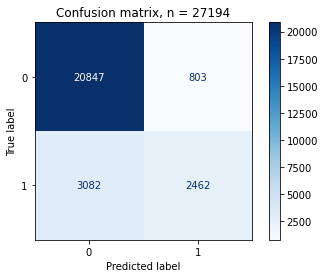

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21650
           1       0.75      0.44      0.56      5544

    accuracy                           0.86     27194
   macro avg       0.81      0.70      0.74     27194
weighted avg       0.85      0.86      0.84     27194



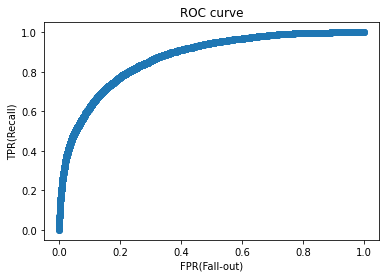

Accuracy of the train set :  0.8591236663361794
Accuracy of the validation set :  0.8571376038832096
AUC Score :  0.8716065888179052


In [ ]:
## Boosting model with hyperparameters applied, XGBClassifier(pipe7)
pipe7 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy = clf2.best_params_['simpleimputer__strategy']),
    XGBClassifier(random_state = 2,
                  learning_rate = clf2.best_params_['xgbclassifier__learning_rate'],
                  max_depth = clf2.best_params_['xgbclassifier__max_depth'],
                  n_estimators = clf2.best_params_['xgbclassifier__n_estimators'])
)
pipe7.fit(X_train_sel, y_train)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe7, X_val_sel, y_val, cmap=plt.cm.Blues, ax=ax, values_format = '.0f');
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=12)
plt.show()

y_pred7 = pipe7.predict(X_val_sel)
print(classification_report(y_val, y_pred7))

y_pred7_proba = pipe7.predict_proba(X_val_sel)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred7_proba)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show();

auc_score7 = roc_auc_score(y_val, y_pred7_proba)

print("Accuracy of the train set : ", pipe7.score(X_train_sel, y_train))
print("Accuracy of the validation set : ", pipe7.score(X_val_sel, y_val))
print("AUC Score : ", auc_score7)

## Final verification

Use the test data to verify and compare the performance of the baseline and final models.

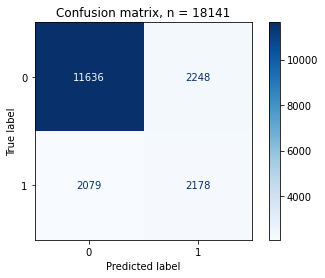

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     13884
           1       0.49      0.51      0.50      4257

    accuracy                           0.76     18141
   macro avg       0.67      0.67      0.67     18141
weighted avg       0.76      0.76      0.76     18141



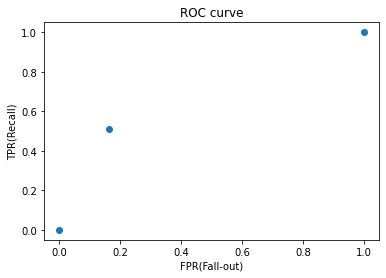

Accuracy of the train set :  1.0
Accuracy of the validation set :  0.782966830918585
★ Accuracy of the test set :  0.7614795215258254
AUC Score :  0.6748574568015384


In [ ]:
## Baseline model performance testing, DecisionTreeClassifire(pipe1)
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe1, X_test, y_test, cmap=plt.cm.Blues, ax=ax, values_format = '.0f');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=12)
plt.show()

y_base_pred = pipe1.predict(X_test)
print(classification_report(y_test, y_base_pred))

y_base_pred_proba = pipe1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_base_pred_proba)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show();

base_auc_score = roc_auc_score(y_test, y_base_pred_proba)

print("Accuracy of the train set : ", pipe1.score(X_train, y_train))
print("Accuracy of the validation set : ", pipe1.score(X_val, y_val))
print("★ Accuracy of the test set : ", pipe1.score(X_test, y_test))
print("AUC Score : ", base_auc_score)

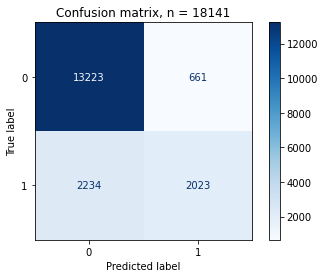

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     13884
           1       0.75      0.48      0.58      4257

    accuracy                           0.84     18141
   macro avg       0.80      0.71      0.74     18141
weighted avg       0.83      0.84      0.83     18141



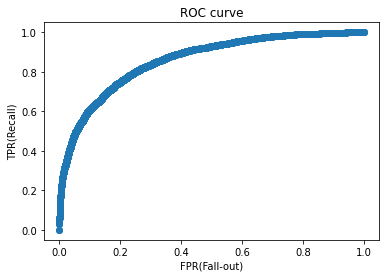

Accuracy of the train set :  0.8591236663361794
Accuracy of the validation set :  0.8571376038832096
★ Accuracy of the test set :  0.8404167355713577
AUC Score :  0.8594409671950827


In [ ]:
## Final model performance testing, XGBClassifier(pipe7)
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe7, X_test_sel, y_test, cmap=plt.cm.Blues, ax=ax, values_format = '.0f');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=12)
plt.show()

y_final_pred = pipe7.predict(X_test_sel)
print(classification_report(y_test, y_final_pred))

y_final_pred_proba = pipe7.predict_proba(X_test_sel)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_final_pred_proba)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show();

final_auc_score = roc_auc_score(y_test, y_final_pred_proba)

print("Accuracy of the train set : ", pipe7.score(X_train_sel, y_train))
print("Accuracy of the validation set : ", pipe7.score(X_val_sel, y_val))
print("★ Accuracy of the test set : ", pipe7.score(X_test_sel, y_test))
print("AUC Score : ", final_auc_score)

## PDP

Analyze the relationship between features and targets using PDP.

In [ ]:
## Encode the data set
enc = OrdinalEncoder()
X_train_encoded = enc.fit_transform(X_train)
X_val_encoded = enc.transform(X_val)
X_test_encoded = enc.transform(X_test)

In [ ]:
pip install PDPbox

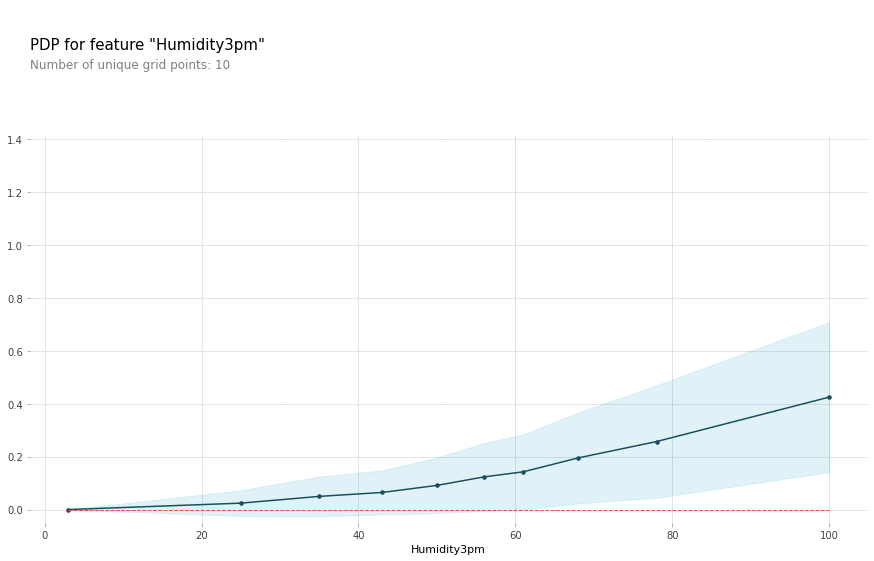

In [ ]:
## Use 1 feature
from pdpbox.pdp import pdp_isolate, pdp_plot
pdp_feature = 'Humidity3pm'
boosting = XGBClassifier(
    random_state = 2,
    learning_rate = clf2.best_params_['xgbclassifier__learning_rate'],
    max_depth = clf2.best_params_['xgbclassifier__max_depth'],
    n_estimators = clf2.best_params_['xgbclassifier__n_estimators']
)

boosting.fit(X_train_encoded, y_train)

isolated = pdp_isolate(
    model = boosting, 
    dataset = X_test_encoded, 
    model_features = X_test_encoded.columns, 
    feature = pdp_feature
)

pdp_plot(isolated, feature_name = pdp_feature);

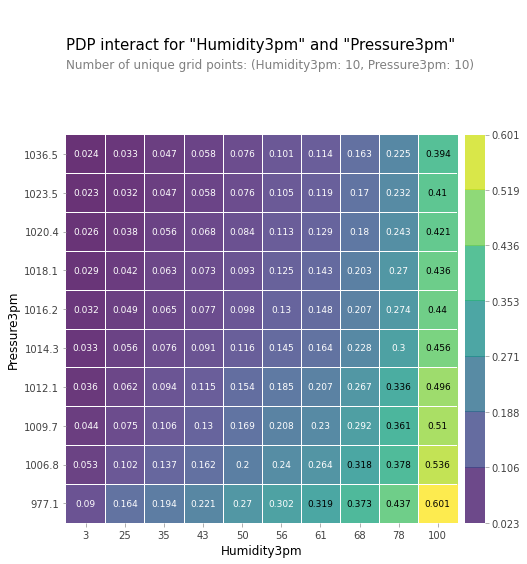

In [ ]:
## Use 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot
pdp_features = ['Humidity3pm', 'Pressure3pm']

interaction = pdp_interact(
    model = boosting, 
    dataset = X_test_encoded,
    model_features = X_test.columns, 
    features = pdp_features
)

pdp_interact_plot(interaction,
                  plot_type = 'grid', 
                  feature_names = pdp_features);

## SHAP

Analyze the relationship between features and targets using SHAP.

In [ ]:
## processing the data set
processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy = clf2.best_params_['simpleimputer__strategy'])
)

X_train_processed = processor.fit_transform(X_train_sel)
X_val_processed = processor.transform(X_val_sel)
X_test_processed = processor.transform(X_test_sel)

In [ ]:
pip install SHAP

In [ ]:
## Select data to analyze
import random
row = X_test_sel.iloc[[random.randint(1, 18141)]]
print("Index of selected data : ", row.index[0])
print("Target value of selected data : ", y_test[row.index[0]])
row

Index of selected data :  142244
Target value of selected data :  1


,Humidity3pm,WindGustSpeed,Pressure3pm,Rainfall,Cloud3pm,Max-Min,Pressure9am,Humidity9am,Cloud9am
142244,86.0,39.0,1008.8,0.2,8.0,3.0,1011.4,73.0,8.0


In [ ]:
## Analyze the data
import shap

model = XGBClassifier(
    random_state = 2,
    learning_rate = clf2.best_params_['xgbclassifier__learning_rate'],
    max_depth = clf2.best_params_['xgbclassifier__max_depth'],
    n_estimators = clf2.best_params_['xgbclassifier__n_estimators']
)
model.fit(X_train_processed, y_train)

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value, 
    shap_values = shap_values, 
    features = row, 
    link = 'logit',
    out_names = f'Index # {row.index[0]}'
)